THIS INFERENCE FILE IS USED TO TEST THE INDIVIDUAL SKIN-DISEASE IMAGE AND IT WILL GIVE THE CLASS IN WHICH THE SKIN-DISEASE BELONGS.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
def load_model(checkpoint_path, class_names):
    model = models.resnet50(weights='ResNet50_Weights.DEFAULT')
    
    # Modify the classifier
    model.fc = nn.Sequential(nn.Linear(2048, 512),
                                    nn.ReLU(),
                                    nn.Dropout(0.2),
                                    nn.Linear(512,len(class_names)),
                                    nn.LogSoftmax(dim=1))
        
    # Load the state dict
    model.load_state_dict(torch.load(checkpoint_path))
    
    return model.to(device)

# Define the process image function
def process_image(image_path):
    image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    return preprocess(image).unsqueeze(0).to(device)

# Define the prediction function
def predict(image, model, class_names):
    model.eval()
    with torch.no_grad():
        output = model(image)
        probabilities = torch.exp(output)
        top_prob, top_class = probabilities.topk(1, dim=1)
        idx_to_name = {i: class_names[i] for i in range(len(class_names))}
        pred_class_name = idx_to_name[top_class.item()]
    return top_prob.item(), pred_class_name

# Define the function to show image
def show_image(image):
    plt.imshow(np.transpose(image.squeeze().cpu().numpy(), (1, 2, 0)))
    plt.axis('off')
    plt.show()

The model is 96.72% certain that the image has a predicted class of orticaria


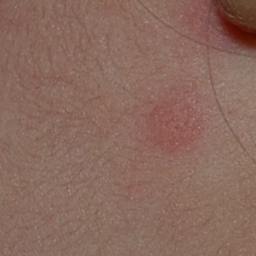

In [16]:
# Define class names
class_names = ['esantema-iatrogeno-farmaco-indotta',
 'esantema-maculo-papuloso',
 'esantema-morbilliforme',
 'esantema-polimorfo-like',
 'esantema-virale',
 'orticaria',
 'pediculosi',
 'scabbia',
 'varicella'] 
 
# Load the model
model = load_model('best_model_mix_data.pth', class_names)

#TEST ON FAIR SKIN IMAGE
image ='mix_data_split/test/orticaria/0036.png'

# Process Image
processed_image = process_image(image)

# Predict
top_prob, top_class = predict(processed_image, model, class_names)


# Print the results
print(f"The model is {top_prob * 100:.2f}% certain that the image has a predicted class of {top_class}")
Image.open(image)


The model is 99.47% certain that the image has a predicted class of scabbia


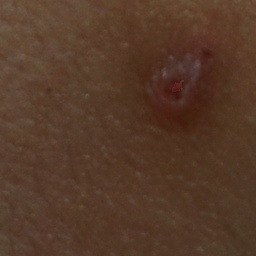

In [15]:
#TEST ON DARK SKIN IMAGE
image ='mix_data_split/test/scabbia/d-1695.png'

# Process Image
processed_image = process_image(image)

# Predict
top_prob, top_class = predict(processed_image, model, class_names)


# Print the results
print(f"The model is {top_prob * 100:.2f}% certain that the image has a predicted class of {top_class}")
Image.open(image)
